In [2]:
import glob
d_path = glob.glob('/Users/ste/code/active_learning/history/1205-002637')[0]
d_path

'/Users/ste/code/active_learning/history/1205-002637'

In [3]:
import os
dataset_path = os.path.join(d_path, 'dataset.pkl')
dataset_path

'/Users/ste/code/active_learning/history/1205-002637/dataset.pkl'

## Lab

In [16]:
import pandas as pd
df = pd.read_pickle(dataset_path)

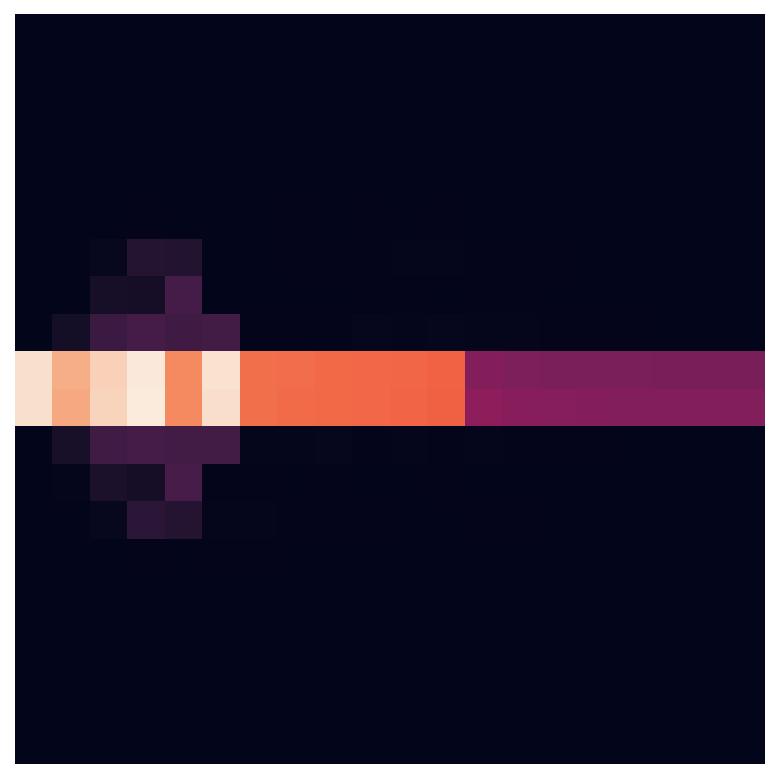

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
def compute_map_density(df):
    a = np.array([np.flip(np.array(x).reshape(20,20), axis=0).flatten() if random.random() > 0.5 else np.array(x) 
                  for x in df['target_map'].iloc[:500].values])
    a[a == 0] = 1
    a[a == -1] = 0
    b = a.sum(axis=0) / a.shape[0]
    fig, ax = plt.subplots(figsize=(5,5),dpi=150)
    ax = sns.heatmap(data=b.reshape(20,20), cbar=False)
    ax.axis('off')
    ax.set_aspect('equal')
    plt.subplots_adjust(0,0,1,1)
    # plt.savefig()
    plt.show()
compute_map_density(df)

In [14]:
import os
#weights_path = os.path.join(glob.glob('/Volumes/home/experiments/*green-gnu_b10/')[0],'checkpoint.pt')
#weights_path = os.path.join(glob.glob('/Volumes/home/experiments/*green-snake/')[0],'checkpoint.pt')
#weights_path = os.path.join(glob.glob('/Users/ste/Desktop/experiments/*green-snake*/')[0],'checkpoint.pt')

weights_path = os.path.join(glob.glob('/Users/ste/code/active_learning/history/*cyan-panda*/')[0],'checkpoint.pt')
assert os.path.exists(weights_path)
weights_path

'/Users/ste/code/active_learning/history/1223-1002_cyan-panda_b10/checkpoint.pt'

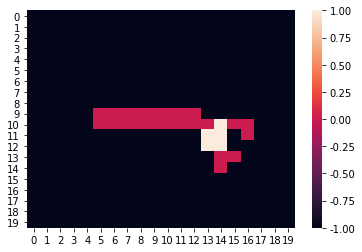

In [404]:
df2 = df.iloc[:2000]
import dataset_ml
importlib.reload(dataset_ml)
import random
random.seed(0)
from dataset_ml import ConvDataset, transform_function

cd = ConvDataset(df2['image'], labels=df2['target_map'], transform=transform_function(resize=True))

from torch.utils.data import DataLoader
loader = DataLoader(cd, batch_size=4, shuffle=False)
X, y = next(iter(loader))
sns.heatmap(data=y[0].reshape(20,20))

In [6]:
import json
import numpy as np
points_file = os.path.join(d_path, 'points.json')
with open(points_file) as f:
    points = json.load(f)
targets = np.array([[t["x"], t["y"]] for t in points["targets"]])
spawn_coords = np.array([[t["x"], t["y"]] for t in points["spawn_coords"]])

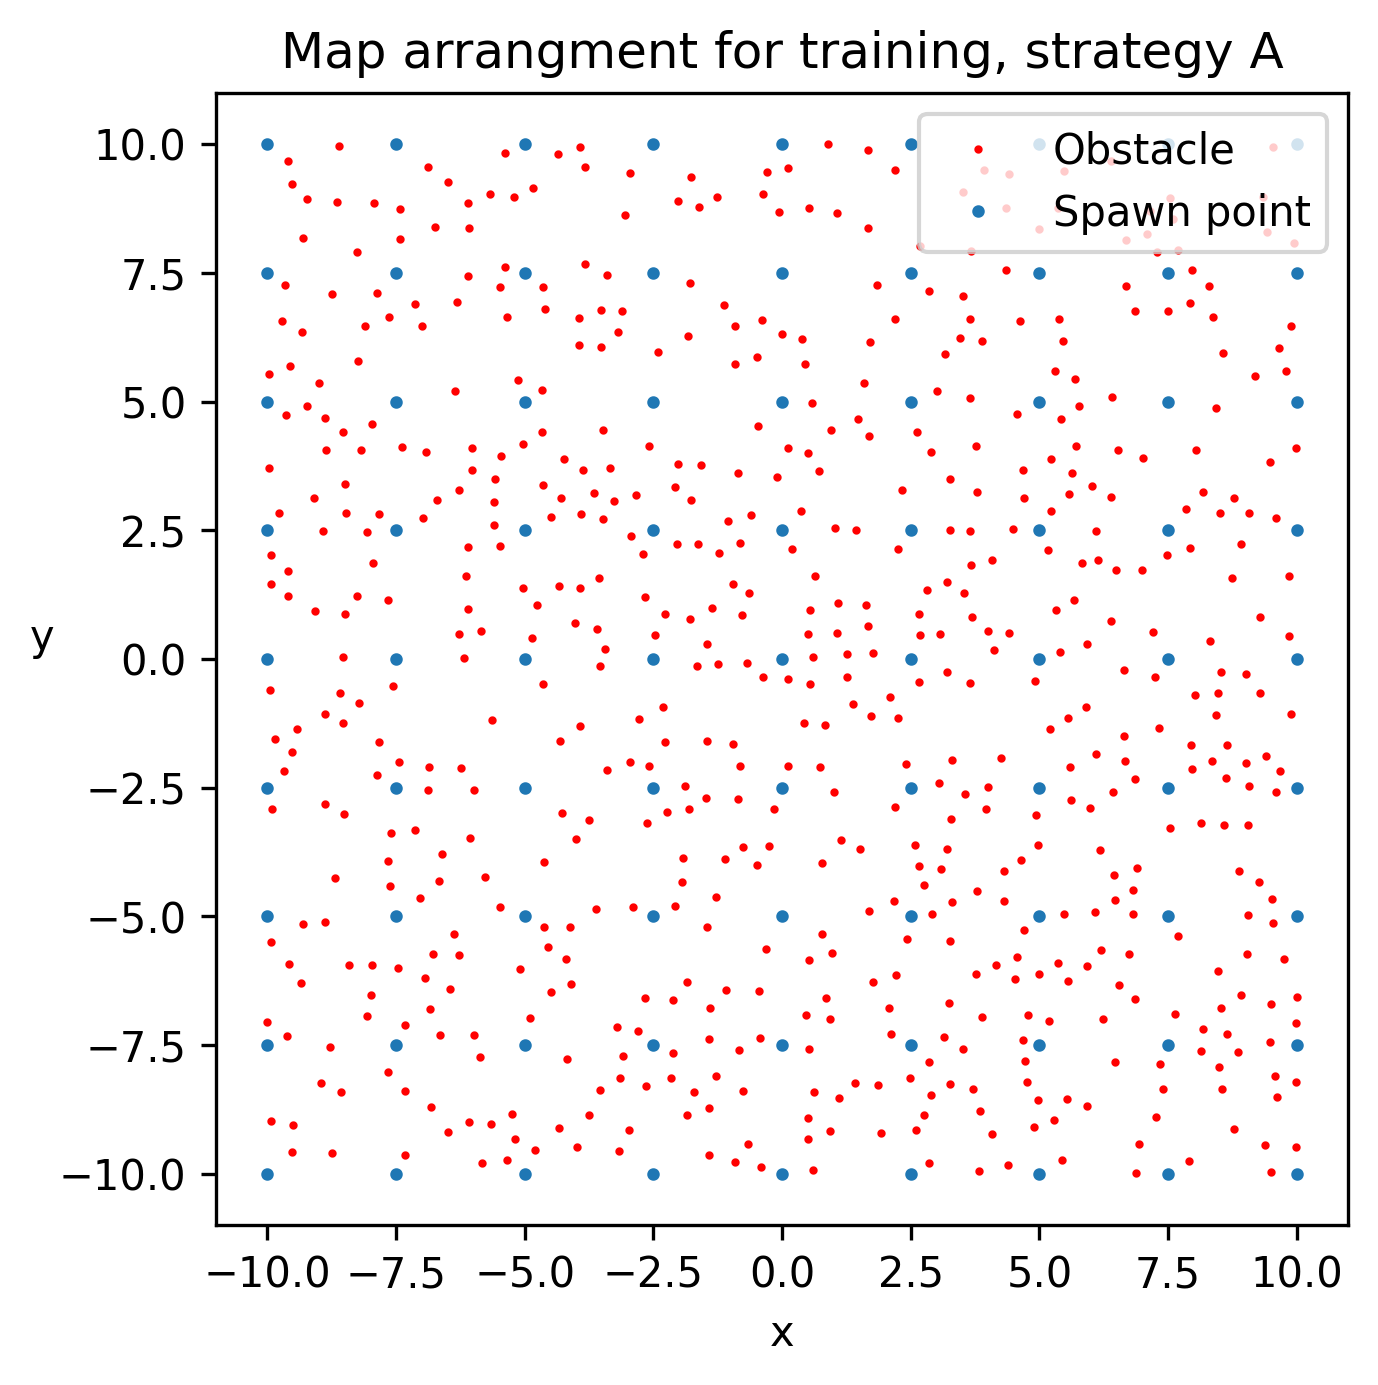

In [40]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5,5),dpi=300)
ax.plot(*targets.T, 'o', c='red',ms=1, label='Obstacle')
ax.plot(*spawn_coords.T, 'o', ms=2, label='Spawn point')
ax.set_xlabel('x')
ax.set_ylabel('y',rotation=0)
ax.set_aspect('equal')
ax.legend()
ax.set_title('Map arrangment for training, strategy A');
plt.savefig('training_map_1.png')

In [39]:
!pwd

/Users/ste/code/active_learning/notebooks


In [356]:
d = torch.load(weights_path, map_location=torch.device(device))

In [357]:
import torch
import sys, pathlib, importlib
path = str(pathlib.Path(os.path.join('..','src','elohim','elohim')).resolve())
if path not in sys.path:
    sys.path.insert(0,path)
import model
importlib.reload(model)
from model import ConvNet, BayesConvNet

In [358]:
parallel = False
bayes = True
device = 'cpu'

In [361]:
common_parameters = {'num_classes': 400, 'mode': 'softmax'}
if bayes:
    irs = [[1, 16, 1, 1],
           [6, 24, 2, 2],
           [6, 32, 3, 2],
           [6, 64, 4, 2]]
    model = BayesConvNet(inverted_residual_setting=irs, **common_parameters)
else:
    irs = [[1, 16, 1, 1],
           [6, 24, 2, 2],
           [6, 32, 3, 2],
           [6, 64, 2, 2],
           [6, 96, 1, 1]]
    model = ConvNet(inverted_residual_setting=irs,**common_parameters)
device = 'cpu'

model = torch.nn.DataParallel(model)
    
model.load_state_dict(torch.load(weights_path, map_location=torch.device(device)))

This bayesian network will sample 12 times
Keys recovered from the pretrained model state that are still compatible: 182


RuntimeError: Error(s) in loading state_dict for DataParallel:
	Missing key(s) in state_dict: "module.features.0.0.weight", "module.features.0.1.weight", "module.features.0.1.bias", "module.features.0.1.running_mean", "module.features.0.1.running_var", "module.features.1.conv.0.0.weight", "module.features.1.conv.0.1.weight", "module.features.1.conv.0.1.bias", "module.features.1.conv.0.1.running_mean", "module.features.1.conv.0.1.running_var", "module.features.1.conv.1.weight", "module.features.1.conv.2.weight", "module.features.1.conv.2.bias", "module.features.1.conv.2.running_mean", "module.features.1.conv.2.running_var", "module.features.2.conv.0.0.weight", "module.features.2.conv.0.1.weight", "module.features.2.conv.0.1.bias", "module.features.2.conv.0.1.running_mean", "module.features.2.conv.0.1.running_var", "module.features.2.conv.1.0.weight", "module.features.2.conv.1.1.weight", "module.features.2.conv.1.1.bias", "module.features.2.conv.1.1.running_mean", "module.features.2.conv.1.1.running_var", "module.features.2.conv.2.weight", "module.features.2.conv.3.weight", "module.features.2.conv.3.bias", "module.features.2.conv.3.running_mean", "module.features.2.conv.3.running_var", "module.features.3.conv.0.0.weight", "module.features.3.conv.0.1.weight", "module.features.3.conv.0.1.bias", "module.features.3.conv.0.1.running_mean", "module.features.3.conv.0.1.running_var", "module.features.3.conv.1.0.weight", "module.features.3.conv.1.1.weight", "module.features.3.conv.1.1.bias", "module.features.3.conv.1.1.running_mean", "module.features.3.conv.1.1.running_var", "module.features.3.conv.2.weight", "module.features.3.conv.3.weight", "module.features.3.conv.3.bias", "module.features.3.conv.3.running_mean", "module.features.3.conv.3.running_var", "module.features.4.conv.0.0.weight", "module.features.4.conv.0.1.weight", "module.features.4.conv.0.1.bias", "module.features.4.conv.0.1.running_mean", "module.features.4.conv.0.1.running_var", "module.features.4.conv.1.0.weight", "module.features.4.conv.1.1.weight", "module.features.4.conv.1.1.bias", "module.features.4.conv.1.1.running_mean", "module.features.4.conv.1.1.running_var", "module.features.4.conv.2.weight", "module.features.4.conv.3.weight", "module.features.4.conv.3.bias", "module.features.4.conv.3.running_mean", "module.features.4.conv.3.running_var", "module.features.5.conv.0.0.weight", "module.features.5.conv.0.1.weight", "module.features.5.conv.0.1.bias", "module.features.5.conv.0.1.running_mean", "module.features.5.conv.0.1.running_var", "module.features.5.conv.1.0.weight", "module.features.5.conv.1.1.weight", "module.features.5.conv.1.1.bias", "module.features.5.conv.1.1.running_mean", "module.features.5.conv.1.1.running_var", "module.features.5.conv.2.weight", "module.features.5.conv.3.weight", "module.features.5.conv.3.bias", "module.features.5.conv.3.running_mean", "module.features.5.conv.3.running_var", "module.features.6.conv.0.0.weight", "module.features.6.conv.0.1.weight", "module.features.6.conv.0.1.bias", "module.features.6.conv.0.1.running_mean", "module.features.6.conv.0.1.running_var", "module.features.6.conv.1.0.weight", "module.features.6.conv.1.1.weight", "module.features.6.conv.1.1.bias", "module.features.6.conv.1.1.running_mean", "module.features.6.conv.1.1.running_var", "module.features.6.conv.2.weight", "module.features.6.conv.3.weight", "module.features.6.conv.3.bias", "module.features.6.conv.3.running_mean", "module.features.6.conv.3.running_var", "module.features.7.conv.0.0.weight", "module.features.7.conv.0.1.weight", "module.features.7.conv.0.1.bias", "module.features.7.conv.0.1.running_mean", "module.features.7.conv.0.1.running_var", "module.features.7.conv.1.0.weight", "module.features.7.conv.1.1.weight", "module.features.7.conv.1.1.bias", "module.features.7.conv.1.1.running_mean", "module.features.7.conv.1.1.running_var", "module.features.7.conv.2.weight", "module.features.7.conv.3.weight", "module.features.7.conv.3.bias", "module.features.7.conv.3.running_mean", "module.features.7.conv.3.running_var", "module.features.8.conv.0.0.weight", "module.features.8.conv.0.1.weight", "module.features.8.conv.0.1.bias", "module.features.8.conv.0.1.running_mean", "module.features.8.conv.0.1.running_var", "module.features.8.conv.1.0.weight", "module.features.8.conv.1.1.weight", "module.features.8.conv.1.1.bias", "module.features.8.conv.1.1.running_mean", "module.features.8.conv.1.1.running_var", "module.features.8.conv.2.weight", "module.features.8.conv.3.weight", "module.features.8.conv.3.bias", "module.features.8.conv.3.running_mean", "module.features.8.conv.3.running_var", "module.features.9.conv.0.0.weight", "module.features.9.conv.0.1.weight", "module.features.9.conv.0.1.bias", "module.features.9.conv.0.1.running_mean", "module.features.9.conv.0.1.running_var", "module.features.9.conv.1.0.weight", "module.features.9.conv.1.1.weight", "module.features.9.conv.1.1.bias", "module.features.9.conv.1.1.running_mean", "module.features.9.conv.1.1.running_var", "module.features.9.conv.2.weight", "module.features.9.conv.3.weight", "module.features.9.conv.3.bias", "module.features.9.conv.3.running_mean", "module.features.9.conv.3.running_var", "module.features.10.conv.0.0.weight", "module.features.10.conv.0.1.weight", "module.features.10.conv.0.1.bias", "module.features.10.conv.0.1.running_mean", "module.features.10.conv.0.1.running_var", "module.features.10.conv.1.0.weight", "module.features.10.conv.1.1.weight", "module.features.10.conv.1.1.bias", "module.features.10.conv.1.1.running_mean", "module.features.10.conv.1.1.running_var", "module.features.10.conv.2.weight", "module.features.10.conv.3.weight", "module.features.10.conv.3.bias", "module.features.10.conv.3.running_mean", "module.features.10.conv.3.running_var", "module.features.11.0.weight", "module.features.11.1.weight", "module.features.11.1.bias", "module.features.11.1.running_mean", "module.features.11.1.running_var", "module.features.study.weight.mean", "module.features.study.weight.scale", "module.classifier.weight", "module.classifier.bias". 
	Unexpected key(s) in state_dict: "features.0.0.weight", "features.0.1.weight", "features.0.1.bias", "features.0.1.running_mean", "features.0.1.running_var", "features.0.1.num_batches_tracked", "features.1.conv.0.0.weight", "features.1.conv.0.1.weight", "features.1.conv.0.1.bias", "features.1.conv.0.1.running_mean", "features.1.conv.0.1.running_var", "features.1.conv.0.1.num_batches_tracked", "features.1.conv.1.weight", "features.1.conv.2.weight", "features.1.conv.2.bias", "features.1.conv.2.running_mean", "features.1.conv.2.running_var", "features.1.conv.2.num_batches_tracked", "features.2.conv.0.0.weight", "features.2.conv.0.1.weight", "features.2.conv.0.1.bias", "features.2.conv.0.1.running_mean", "features.2.conv.0.1.running_var", "features.2.conv.0.1.num_batches_tracked", "features.2.conv.1.0.weight", "features.2.conv.1.1.weight", "features.2.conv.1.1.bias", "features.2.conv.1.1.running_mean", "features.2.conv.1.1.running_var", "features.2.conv.1.1.num_batches_tracked", "features.2.conv.2.weight", "features.2.conv.3.weight", "features.2.conv.3.bias", "features.2.conv.3.running_mean", "features.2.conv.3.running_var", "features.2.conv.3.num_batches_tracked", "features.3.conv.0.0.weight", "features.3.conv.0.1.weight", "features.3.conv.0.1.bias", "features.3.conv.0.1.running_mean", "features.3.conv.0.1.running_var", "features.3.conv.0.1.num_batches_tracked", "features.3.conv.1.0.weight", "features.3.conv.1.1.weight", "features.3.conv.1.1.bias", "features.3.conv.1.1.running_mean", "features.3.conv.1.1.running_var", "features.3.conv.1.1.num_batches_tracked", "features.3.conv.2.weight", "features.3.conv.3.weight", "features.3.conv.3.bias", "features.3.conv.3.running_mean", "features.3.conv.3.running_var", "features.3.conv.3.num_batches_tracked", "features.4.conv.0.0.weight", "features.4.conv.0.1.weight", "features.4.conv.0.1.bias", "features.4.conv.0.1.running_mean", "features.4.conv.0.1.running_var", "features.4.conv.0.1.num_batches_tracked", "features.4.conv.1.0.weight", "features.4.conv.1.1.weight", "features.4.conv.1.1.bias", "features.4.conv.1.1.running_mean", "features.4.conv.1.1.running_var", "features.4.conv.1.1.num_batches_tracked", "features.4.conv.2.weight", "features.4.conv.3.weight", "features.4.conv.3.bias", "features.4.conv.3.running_mean", "features.4.conv.3.running_var", "features.4.conv.3.num_batches_tracked", "features.5.conv.0.0.weight", "features.5.conv.0.1.weight", "features.5.conv.0.1.bias", "features.5.conv.0.1.running_mean", "features.5.conv.0.1.running_var", "features.5.conv.0.1.num_batches_tracked", "features.5.conv.1.0.weight", "features.5.conv.1.1.weight", "features.5.conv.1.1.bias", "features.5.conv.1.1.running_mean", "features.5.conv.1.1.running_var", "features.5.conv.1.1.num_batches_tracked", "features.5.conv.2.weight", "features.5.conv.3.weight", "features.5.conv.3.bias", "features.5.conv.3.running_mean", "features.5.conv.3.running_var", "features.5.conv.3.num_batches_tracked", "features.6.conv.0.0.weight", "features.6.conv.0.1.weight", "features.6.conv.0.1.bias", "features.6.conv.0.1.running_mean", "features.6.conv.0.1.running_var", "features.6.conv.0.1.num_batches_tracked", "features.6.conv.1.0.weight", "features.6.conv.1.1.weight", "features.6.conv.1.1.bias", "features.6.conv.1.1.running_mean", "features.6.conv.1.1.running_var", "features.6.conv.1.1.num_batches_tracked", "features.6.conv.2.weight", "features.6.conv.3.weight", "features.6.conv.3.bias", "features.6.conv.3.running_mean", "features.6.conv.3.running_var", "features.6.conv.3.num_batches_tracked", "features.7.conv.0.0.weight", "features.7.conv.0.1.weight", "features.7.conv.0.1.bias", "features.7.conv.0.1.running_mean", "features.7.conv.0.1.running_var", "features.7.conv.0.1.num_batches_tracked", "features.7.conv.1.0.weight", "features.7.conv.1.1.weight", "features.7.conv.1.1.bias", "features.7.conv.1.1.running_mean", "features.7.conv.1.1.running_var", "features.7.conv.1.1.num_batches_tracked", "features.7.conv.2.weight", "features.7.conv.3.weight", "features.7.conv.3.bias", "features.7.conv.3.running_mean", "features.7.conv.3.running_var", "features.7.conv.3.num_batches_tracked", "features.8.conv.0.0.weight", "features.8.conv.0.1.weight", "features.8.conv.0.1.bias", "features.8.conv.0.1.running_mean", "features.8.conv.0.1.running_var", "features.8.conv.0.1.num_batches_tracked", "features.8.conv.1.0.weight", "features.8.conv.1.1.weight", "features.8.conv.1.1.bias", "features.8.conv.1.1.running_mean", "features.8.conv.1.1.running_var", "features.8.conv.1.1.num_batches_tracked", "features.8.conv.2.weight", "features.8.conv.3.weight", "features.8.conv.3.bias", "features.8.conv.3.running_mean", "features.8.conv.3.running_var", "features.8.conv.3.num_batches_tracked", "features.9.conv.0.0.weight", "features.9.conv.0.1.weight", "features.9.conv.0.1.bias", "features.9.conv.0.1.running_mean", "features.9.conv.0.1.running_var", "features.9.conv.0.1.num_batches_tracked", "features.9.conv.1.0.weight", "features.9.conv.1.1.weight", "features.9.conv.1.1.bias", "features.9.conv.1.1.running_mean", "features.9.conv.1.1.running_var", "features.9.conv.1.1.num_batches_tracked", "features.9.conv.2.weight", "features.9.conv.3.weight", "features.9.conv.3.bias", "features.9.conv.3.running_mean", "features.9.conv.3.running_var", "features.9.conv.3.num_batches_tracked", "features.10.conv.0.0.weight", "features.10.conv.0.1.weight", "features.10.conv.0.1.bias", "features.10.conv.0.1.running_mean", "features.10.conv.0.1.running_var", "features.10.conv.0.1.num_batches_tracked", "features.10.conv.1.0.weight", "features.10.conv.1.1.weight", "features.10.conv.1.1.bias", "features.10.conv.1.1.running_mean", "features.10.conv.1.1.running_var", "features.10.conv.1.1.num_batches_tracked", "features.10.conv.2.weight", "features.10.conv.3.weight", "features.10.conv.3.bias", "features.10.conv.3.running_mean", "features.10.conv.3.running_var", "features.10.conv.3.num_batches_tracked", "features.11.0.weight", "features.11.1.weight", "features.11.1.bias", "features.11.1.running_mean", "features.11.1.running_var", "features.11.1.num_batches_tracked", "features.study.weight.mean", "features.study.weight.scale", "classifier.weight", "classifier.bias". 

In [363]:
import dataset_ml
importlib.reload(dataset_ml)
from dataset_ml import get_dataset

(_, _, test_loader), _ = get_dataset(d_path, batch_size=16, resize=bayes, test_only=True)

Loading splits pickles into memory: 100%|██████████| 1/1 [00:00<00:00,  1.05it/s]


AttributeError: 'DataFrame' object has no attribute '_data'

In [339]:
from dataset_ml import transform
from tqdm import tqdm
tqdm.pandas()

## Full testing set

In [ ]:
model.eval()
outputs, ys = [], []
with torch.no_grad():
    for batch_idx, (X, y) in enumerate(tqdm(test_loader, desc=f'Testing, last loss: {loss.item():2.4f})')):
        output, loss, auc, entropy, accuracy = testing_step(model, X.to(device), y.to(device), loss_function,
                                                            auc_function, aggregate_samples,
                                                            entropy_accuracy_function, device)
        outputs.append(free_tensor(output))
        ys.append(free_tensor(y))

## Batch

In [106]:
import numpy as np, importlib
from training import free_tensor
import dataset_ml
importlib.reload(dataset_ml)
from dataset_ml import transform_function
from time import sleep
from IPython.display import Video
import animator
importlib.reload(animator)
from animator import Animator

batch_size = 16

def visual_test(model, dataset, targets, path, device, n=5, bayes=False, run_ids=None, batch_size=8):
    def store_animation(run_id, batch_size):

        run_df = dataset[dataset['run'] == run_id].copy()
        model.eval()
        with torch.no_grad():
            batches = np.split(run_df, np.arange(batch_size, len(run_df), batch_size))
            preds = []
            for x in tqdm(batches, desc=f'Computing predictions (batch size: {batch_size})'):
                p = model(torch.stack(x['image'].map(transform_function(resize=bayes)).values.tolist()).to(device))
                if bayes:
                    p = torch.stack(p, dim=0).mean(dim=0)
                preds.append(free_tensor(p))
            occ_map = np.vstack(preds)[...,-1]
        run_df['predicted_map'] = pd.Series(occ_map.tolist(), index=run_df.index)
        video_path = os.path.join(path, f'{run_id}.mp4')
        Animator(run_df, targets, save_path=video_path)
        #print(video_path)
    interesting_run_ids = dataset[~dataset['out_of_map']]['run'].unique()
    
    if run_ids is None:
        n = min(n, len(interesting_run_ids))
        run_ids = np.random.choice(interesting_run_ids, size=n)
    else:
        n = len(run_ids)
    print(f'Computing animations with predictions for {n} run{"s" if n > 1 else ""}:')
    sleep(0.2)
    for r in run_ids:
        store_animation(r, batch_size)
        sleep(0.2)

exp_dir = path=os.path.join(d_path, 'experiments', 'green_snake')
# bayes run_ids = [862, 786, 577, 500, 251, 188, 158, 84, 40, 16]
run_ids = [891, 703, 697, 652, 625, 440, 356, 324, 123]
visual_test(model, dataset, targets, exp_dir, 'cpu', bayes=False, run_ids=run_ids, batch_size=16)


Computing animations with predictions for 9 runs:


Computing predictions (batch size: 16): 100%|██████████| 29/29 [00:29<00:00,  1.02s/it]


Process complete. Video file saved to: /Users/ste/code/active_learning/history/1205-002637/experiments/green_snake/891.mp4


Computing predictions (batch size: 16): 100%|██████████| 28/28 [00:26<00:00,  1.08it/s]


Process complete. Video file saved to: /Users/ste/code/active_learning/history/1205-002637/experiments/green_snake/703.mp4


Computing predictions (batch size: 16): 100%|██████████| 25/25 [00:23<00:00,  1.05it/s]


Process complete. Video file saved to: /Users/ste/code/active_learning/history/1205-002637/experiments/green_snake/697.mp4


Computing predictions (batch size: 16): 100%|██████████| 12/12 [00:11<00:00,  1.08it/s]


Process complete. Video file saved to: /Users/ste/code/active_learning/history/1205-002637/experiments/green_snake/652.mp4


Computing predictions (batch size: 16): 100%|██████████| 24/24 [00:22<00:00,  1.04it/s]


Process complete. Video file saved to: /Users/ste/code/active_learning/history/1205-002637/experiments/green_snake/625.mp4


Computing predictions (batch size: 16): 100%|██████████| 19/19 [00:18<00:00,  1.05it/s]


Process complete. Video file saved to: /Users/ste/code/active_learning/history/1205-002637/experiments/green_snake/440.mp4


Computing predictions (batch size: 16): 100%|██████████| 23/23 [00:21<00:00,  1.06it/s]


Process complete. Video file saved to: /Users/ste/code/active_learning/history/1205-002637/experiments/green_snake/356.mp4


Computing predictions (batch size: 16): 100%|██████████| 27/27 [00:25<00:00,  1.06it/s]


Process complete. Video file saved to: /Users/ste/code/active_learning/history/1205-002637/experiments/green_snake/324.mp4


Computing predictions (batch size: 16): 100%|██████████| 23/23 [00:21<00:00,  1.08it/s]


Process complete. Video file saved to: /Users/ste/code/active_learning/history/1205-002637/experiments/green_snake/123.mp4


## Precision work

In [165]:
run_df = dataset[dataset['run'] == 123].iloc[-16:].copy()

In [169]:
bayes = False
batch_size = 8
model.eval()
with torch.no_grad():
    batches = np.split(run_df, np.arange(batch_size, len(run_df), batch_size))
    preds = []
    for x in tqdm(batches, desc=f'Computing predictions (batch size: {batch_size})'):
        p = model(torch.stack(x['image'].map(transform_function(resize=bayes)).values.tolist()).to(device))
        #if bayes:
        #    p = torch.stack(p, dim=0).mean(dim=0)
            
        
        preds.append(free_tensor(p))
    occ_map = np.vstack(preds)[...,-1]
run_df['predicted_map'] = pd.Series(occ_map.tolist(), index=run_df.index)
video_path = os.path.join(d_path, 'experiments', 'test', f'{run_id}.mp4')

Computing predictions (batch size: 8): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]


(16, 400) (16, 400)
(400,)


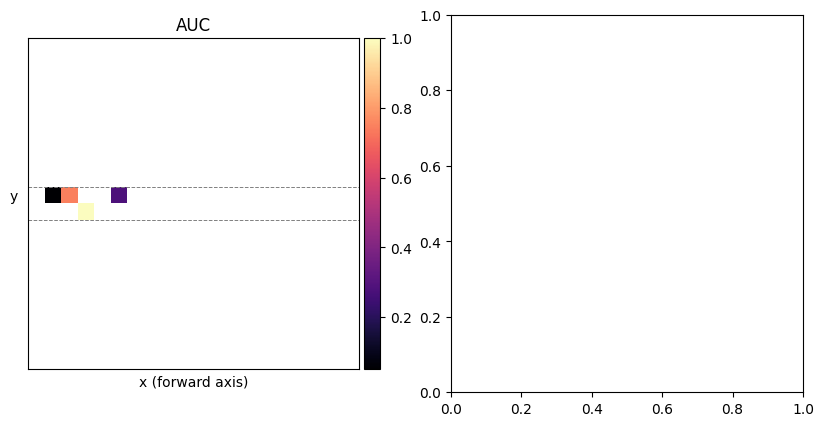

In [325]:
import training
importlib.reload(training)
from training import compute_masks
from sklearn.metrics import roc_auc_score
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable


# Argmax
output = np.vstack(preds)[...,1]

# Desired occupancy map
y = np.array([np.array(x) for x in run_df['target_map'].values])

print(output.shape, y.shape)

cmap = cm.magma

lst = []
for i in range(400):
    val = np.nan
    if len(np.unique(y[:, i])) != 1:
        val = roc_auc_score(y[:, i], output[:, i])
    lst.append(val)
print(np.array(lst).shape)
data = np.array(lst).reshape(20,20)

fig, axs = plt.subplots(1, 2, figsize=(10,5), dpi=100)
ax = axs[0]
im = ax.imshow(data, cmap=cmap)

ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('x (forward axis)')
ax.set_ylabel('y', rotation=0, labelpad=10)
ax.plot([0, 1], [9 / 20, 9 / 20], linewidth=0.7, linestyle='--', color='grey', transform=ax.transAxes)
ax.plot([0, 1], [11 / 20, 11 / 20], linewidth=0.7, linestyle='--', color='grey', transform=ax.transAxes)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im, ax=ax, cax=cax)
ax.set_title('AUC')

# lst = []
# for i in range(400):
#     val = cmap(np.sum(-output[:,i] * np.log(output[:, i] + 1e-10)))
#     lst.append(val)
# print(np.array(lst).shape)
# data = np.array(lst).reshape(20,20,-1)
                     
# ax = axs[1]
# im = ax.imshow(data, cmap=cmap)

# ax.set_xticks([])
# ax.set_yticks([])
# ax.set_xlabel('x (forward axis)')
# ax.set_ylabel('y', rotation=0, labelpad=10)
# ax.set_title('Entropy')
# ax.plot([0, 1], [9 / 20, 9 / 20], linewidth=0.7, linestyle='--', color='grey', transform=ax.transAxes)
# ax.plot([0, 1], [11 / 20, 11 / 20], linewidth=0.7, linestyle='--', color='grey', transform=ax.transAxes)
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.05)
# fig.colorbar(im, ax=ax, cax=cax)
# plt.tight_layout()
plt.show()

In [315]:
display(y.shape)
np.sum(y, axis=0).shape

(16, 400)

(400,)

In [300]:
print(output.shape, y.shape)

# AUC
lst = []
for i in range(400):
    val = np.nan
    if len(np.unique(y[:, i])) != 1:
        val = roc_auc_score(y[:, i], output[:, i])
    lst.append(val)
print('AUC cells:', len(lst), end=', ')
# Entropy
lst = []¢¢
for i in range(400):
    val = np.nan
    if (output[:, i] != 0).all():
        val = np.sum(-output[:,i] * np.log(output[:, i]))
    lst.append(val)
print('Entropy cells:', len(lst))

(16, 400) (16, 400)
AUC cells: 400, Entropy cells: 400


In [301]:
roc_auc_score(y, output)

ValueError: multiclass-multioutput format is not supported

In [148]:
importlib.reload(animator)
from animator import Animator
Animator(run_df, targets, save_path=video_path)
subprocess.call(['/Applications/mpv.app/Contents/MacOS/mpv', video_path]);

Process complete. Video file saved to: /Users/ste/code/active_learning/history/1205-002637/experiments/test/507.mp4


## Junkyard

/usr/local/lib/python3.8/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
100%|██████████| 4/4 [00:03<00:00,  1.25it/s]


(50, 400, 2)

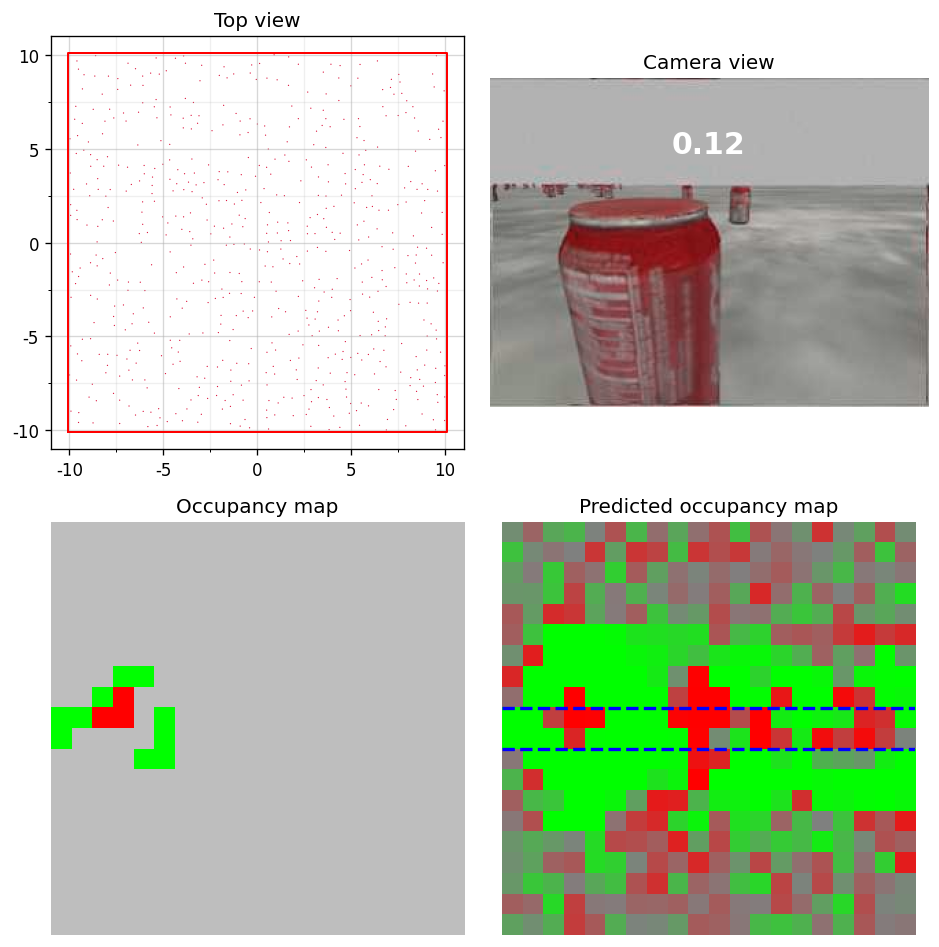

In [51]:
importlib.reload(animator)
run_id = 507
run_df = dataset[dataset['run'] == run_id].iloc[-50:].copy()
model.eval()
with torch.no_grad():
    batches = np.split(run_df, np.arange(batch_size, len(run_df), batch_size))
    preds = [model(torch.stack(x['image'].map(transform).values.tolist())).detach() for x in tqdm(batches)]
    #occ_map = np.argmax(np.vstack(preds), axis=-1)
    display(np.vstack(preds).shape)
    occ_map = np.vstack(preds)[...,-1]
run_df['predicted_map'] = pd.Series(occ_map.tolist(), index=run_df.index)
video_path = os.path.join(path, f'{run_id}.mp4')
animator.Animator(run_df, targets)

'/Users/ste/code/active_learning/history/1205-002637/experiments/tests/104.mp4'

In [120]:
from IPython.display import Video

video_path = os.path.join(d_path,"experiments/104.mp4")
Video(video_path)

ValueError: To embed videos, you must pass embed=True (this may make your notebook files huge)
Consider passing Video(url='...')

In [119]:
d_path

'/Users/ste/code/active_learning/history/1205-002637/'

In [101]:
import analyzer, importlib
importlib.reload(analyzer)

from IPython.display import Video
video_path = os.path.join(d_path,'experiments','time_green-panda','run_id.mp4')
analyzer.Animator(check, targets, save_path=video_path);
Video(video_path)

/usr/local/lib/python3.8/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


Process complete. Video file saved to: /Users/ste/code/active_learning/history/1205-002637/experiments/time_green-panda/run_id.mp4


In [86]:
model

ConvNet(
  (features): Sequential(
    (0): ConvBNReLU(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, 